In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("Airbnb_Open_Data.csv")

C:\Users\Heman\AppData\Local\Temp\ipykernel_17420\2370090028.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv("Airbnb_Open_Data.csv")


In [3]:
df = pd.DataFrame(data)

In [5]:
df1=df

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Normalize column names
print(df.columns)


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')


In [9]:
df1=df
# droping minimum nights cause the data entered is not correct
df1=df.drop(["minimum_nights"],axis=1)
# we are dropping availability 365 also as it contains wrong entry of data even though it effects the price
df1=df1.drop(["availability_365"],axis=1)

In [10]:
# Replace all non-null values in 'column_name' with 'Yes'
df1['house_rules'] = df1['house_rules'].apply(lambda x: 'Yes' if pd.notnull(x) else x)

# Fill missing values in 'column_name' with 'Unknown'
df1['house_rules'].fillna('No', inplace=True)

C:\Users\Heman\AppData\Local\Temp\ipykernel_17420\429281975.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['house_rules'].fillna('No', inplace=True)


In [11]:
# now as of price and service fee are object type we need to convert them into int type
#coz money should be in numbers i.e,int not in object type

columns_to_convert = ["price","service_fee"]
for column in columns_to_convert:
    df1[column] = df[column].replace({'\$': '', ',': ''}, regex=True)
    df1[column] = df1[column].astype('Int64')

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Heman\AppData\Local\Temp\ipykernel_17420\2900728454.py:6: SyntaxWarning: invalid escape sequence '\$'
  df1[column] = df[column].replace({'\$': '', ',': ''}, regex=True)


In [13]:
import seaborn as sns

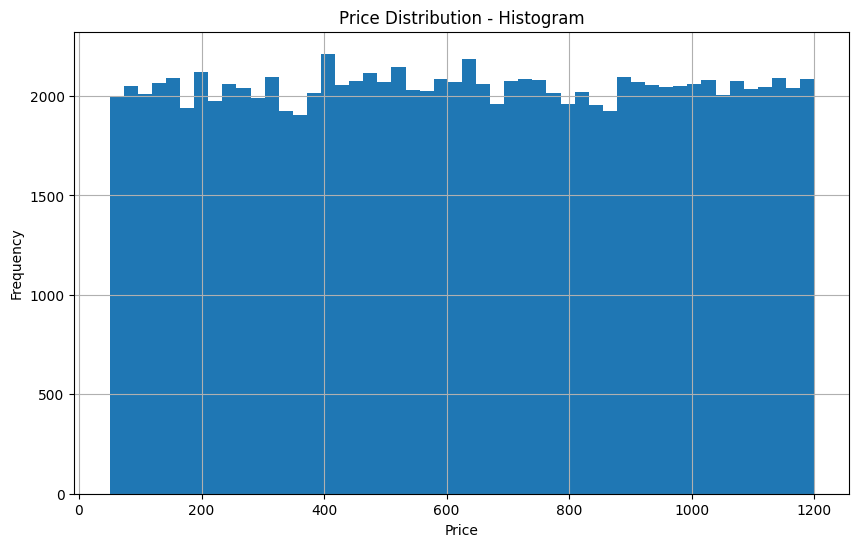

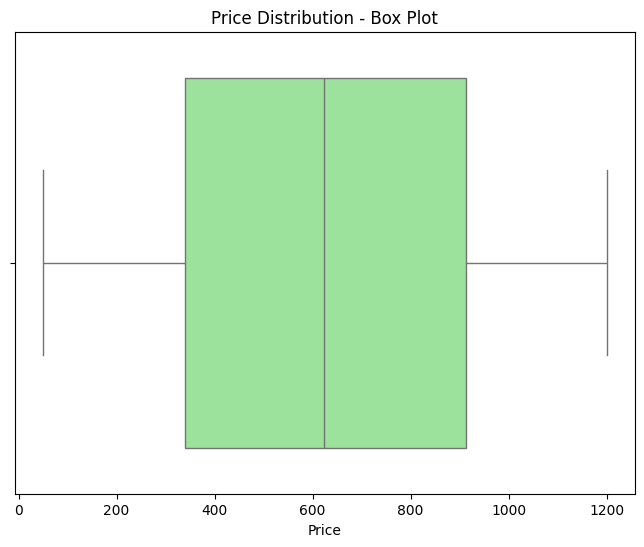

In [14]:
plt.figure(figsize=(10, 6))
df1["price"].hist(bins=50)
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['price'], color='lightgreen')
plt.title('Price Distribution - Box Plot')
plt.xlabel('Price')
plt.show()

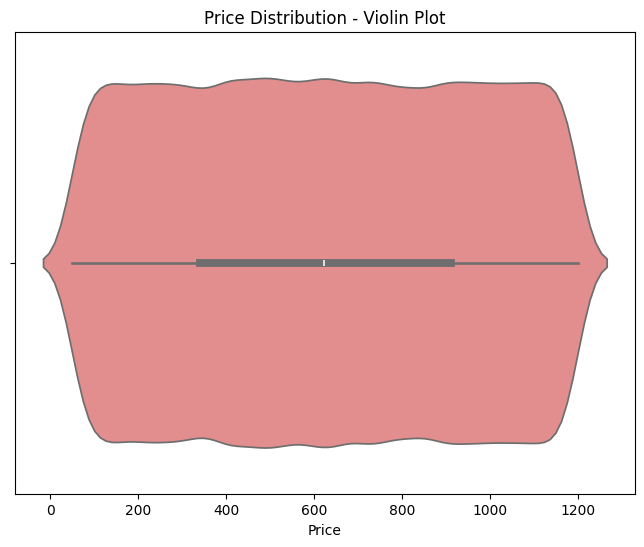

In [16]:
#Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=df1['price'], color='lightcoral')
plt.title('Price Distribution - Violin Plot')
plt.xlabel('Price')
plt.show()

perfect box plot gbt

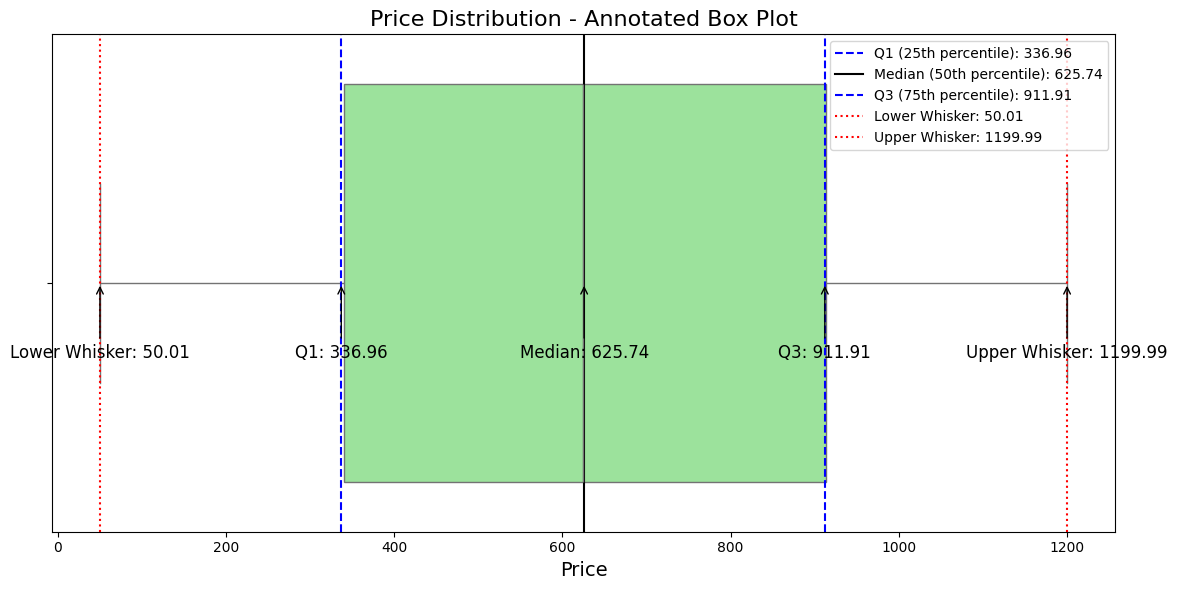

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Generate Example Price Data
# ----------------------------
np.random.seed(42)
# Simulated price data between 50 and 1200
price_data = np.random.rand(102546) * 1150 + 50  
#changed to df2 cause for plotting just the price data we need to convert it into dataframe
df2= pd.DataFrame({'price': price_data})

# ----------------------------
# 2. Calculate Key Statistics
# ----------------------------
Q1 = df2['price'].quantile(0.25)
median = df2['price'].median()
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate whiskers (using the 1.5*IQR rule)
lower_whisker = df2['price'][df2['price'] >= (Q1 - 1.5 * IQR)].min()
upper_whisker = df2['price'][df2['price'] <= (Q3 + 1.5 * IQR)].max()

# ----------------------------
# 3. Create and Annotate the Box Plot
# ----------------------------
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=df1['price'], color='lightgreen')

# Title and labels
plt.title('Price Distribution - Annotated Box Plot', fontsize=16)
plt.xlabel('Price', fontsize=14)

# Draw vertical lines for the statistics
plt.axvline(Q1, color='blue', linestyle='--', linewidth=1.5, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(median, color='black', linestyle='-', linewidth=1.5, label=f'Median (50th percentile): {median:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=1.5, label=f'Q3 (75th percentile): {Q3:.2f}')
plt.axvline(lower_whisker, color='red', linestyle=':', linewidth=1.5, label=f'Lower Whisker: {lower_whisker:.2f}')
plt.axvline(upper_whisker, color='red', linestyle=':', linewidth=1.5, label=f'Upper Whisker: {upper_whisker:.2f}')

# Optionally, annotate directly on the plot with text arrows
def annotate_stat(stat_value, label, y_position):
    plt.annotate(
        label,
        xy=(stat_value, y_position), 
        xytext=(stat_value, y_position + 0.15),
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        horizontalalignment='center', fontsize=12
    )

# For a horizontal box plot, the box is plotted at y=0 (or in the middle of the categorical axis)
# Adjust y positions as needed; here we use 0 for the box and 0.1 for the annotation start.
annotate_stat(Q1, f'Q1: {Q1:.2f}', 0)
annotate_stat(median, f'Median: {median:.2f}', 0)
annotate_stat(Q3, f'Q3: {Q3:.2f}', 0)
annotate_stat(lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', 0)
annotate_stat(upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', 0)

# Show legend
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


gbts code for the project


In [ ]:
#i didn't check this code 
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df1 = pd.read_csv("your_dataset.csv")

# Drop irrelevant columns
drop_columns = ['id', 'NAME', 'host id', 'host name', 'license', 'house_rules', 'last review']
df1.drop(columns=drop_columns, inplace=True)

# Handling missing values
df1.fillna({
    'reviews per month': df1['reviews per month'].mean(),
    'review rate number': df1['review rate number'].mean(),
    'calculated host listings count': df1['calculated host listings count'].mean()
}, inplace=True)

# Encoding categorical features
categorical_cols = ['cancellation_policy', 'instant_bookable', 'room type']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df1[categorical_cols])

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate new encoded features
df1.drop(columns=categorical_cols, inplace=True)
df1 = pd.concat([df1, encoded_df], axis=1)

# Using 'lat' and 'long' instead of 'neighbourhood' for geographical impact
df1.drop(columns=['neighbourhood', 'neighbourhood group'], inplace=True)

# Splitting data into training and testing sets
X = df1.drop(columns=['price'])  # Features
y = df1['price']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using RandomForest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
